## 학습 목표

- 추천 시스템의 기본 개념에 대해 학습합니다.
- 추천 시스템의 종류에 대해 학습하고 사이킷런을 활용하여 연습해 봅니다.
- 실제 추천 시스템에는 더 많은 기술이 적용됨을 이해합니다.

## 추천 시스템이란?

- 실제 추천 시스템에서는 영화들을 이렇게 좌표 평면에 표현합니다. 물론 수식을 이용해 정교하게 그리지만 일단 대략 비슷한 것들끼리 한번 배치해 볼게요.
- 이렇게 놓고 봤을때, 거리가 좁으면 좁을수록 유사도가 높다고 생각할 수 있습니다. 즉, 사용자와 관련된 항목을 찾아 추천해 줄 수 있습니다.

> 요약하면,  
> 범주형, 이산적인 데이터를 숫자 벡터로 변환합니다.  
> 이 숫자 벡터의 유사도를 계산하여 유사도가 가까운 (혹은 높은) 제품을 추천해 줍니다.

## 코사인 유사도

그럼 실제로 어떻게 범주형 데이터들을 벡터로 변환한 뒤 유사도를 계산할 수 있을까요? 유사도를 계산하는 방법 중 가장 잘 알려진 방법은 코사인 유사도(Cosine Similarity)입니다. 코사인 유사도는 두 벡터 간의 코사인 값을 이용해 두 벡터의 유사도를 계산합니다.

코사인 유사도는 두 벡터의 방향이 이루는 각에 코사인을 취해 구합니다. 따라서, 두 벡터의 방향이 완전히 동일한 경우는 1, 90°의 각을 이루면 0, 반대 방향, 즉 각이 180°이면 -1의 값을 갖게 됩니다. 따라서 코사인 유사도는 -1 ~ 1사이의 값이고, 1에 가까울 수록 유사도가 높다고 할 수 있습니다.

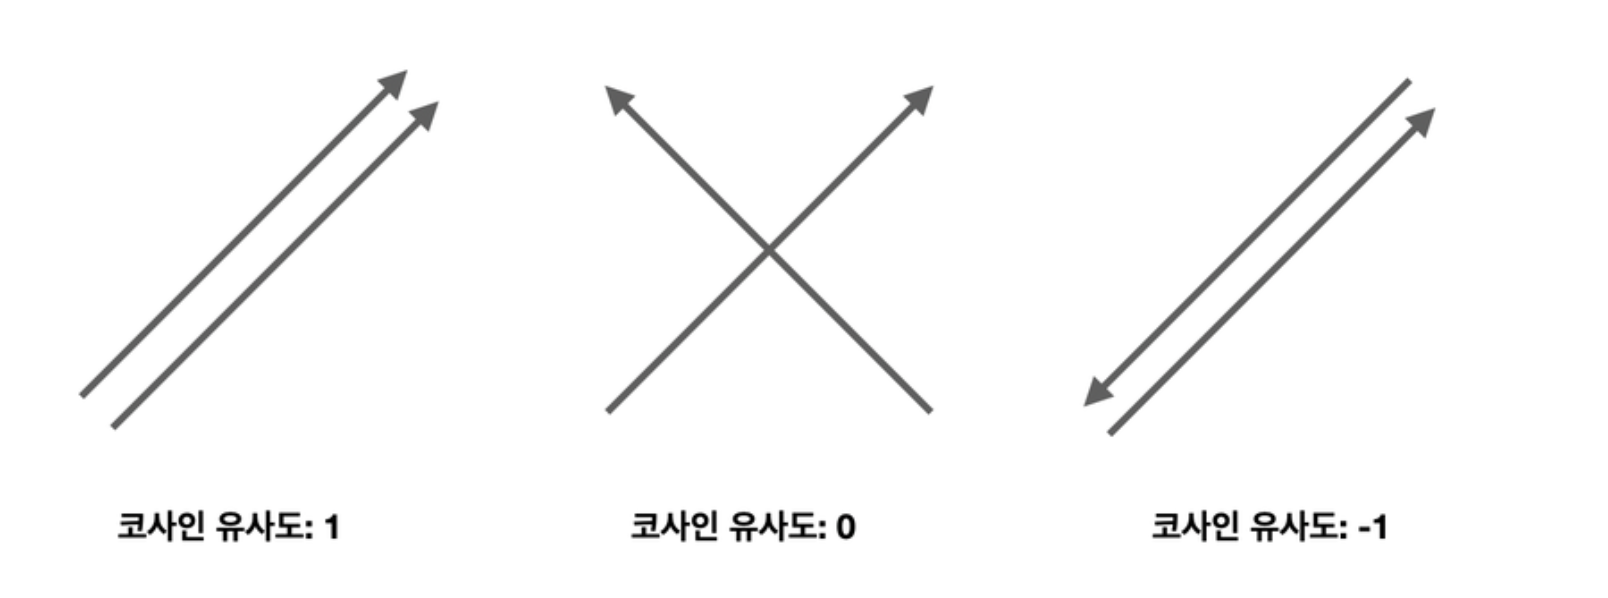

두 벡터 A와 B의 코사인 유사도 수식은 다음과 같습니다.

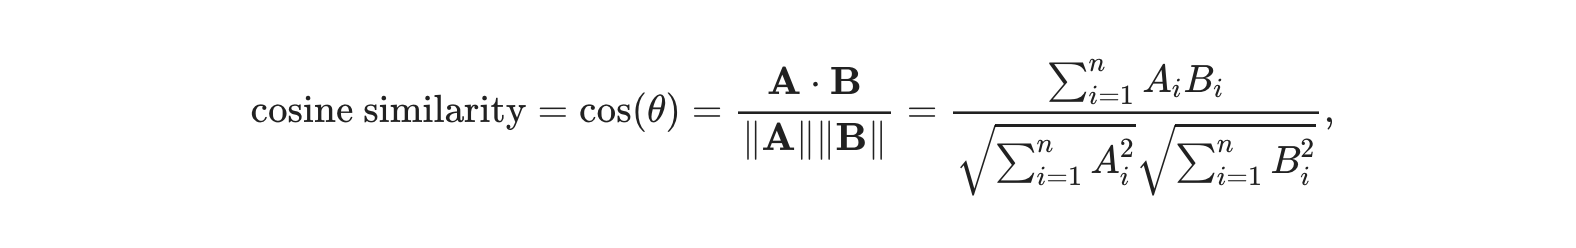

우선 숫자 벡터가 만들어졌다고 가정한 뒤, 코사인 유사도를 계산하는 방법을 알아보겠습니다.

### NumPy 활용

In [3]:
import numpy as np

t1 = np.array([1, 1, 1])
t2 = np.array([2, 0, 1])

In [5]:
from numpy import dot
from numpy.linalg import norm
def cos_sim(A, B):
    return dot(A, B)/(norm(A)*norm(B))

In [6]:
cos_sim(t1, t2)

0.7745966692414834

### 사이킷런 활용

-  사이킷런에서 코사인 다음 모듈을 임포트 해주면 쉽게 사용할 수 있습니다.

In [7]:
from sklearn.metrics.pairwise import cosine_similarity

In [8]:
t1 = np.array([[1, 1, 1]])
t2 = np.array([[2, 0, 1]])
cosine_similarity(t1,t2)

array([[0.77459667]])

In [9]:
t1.shape

(1, 3)

In [10]:
tt1 = np.array([1, 1, 1])
tt2 = np.array([2, 0, 1])

tt1. shape

(3,)

In [12]:
# cosine_similarity(tt1, tt2) 에러남 
# >>> ValueError: Expected 2D array, got 1D array instead:

> 기타 다른 유사도 계산법  
> 코사인 유사도 이외에도 유클리드 거리, 자카드 유사도, 피어슨 상관계수 등의 다른 방법으로 유사도를 계산할 수 있습니다.

## 추천시스템의 종류

▶︎ 콘텐츠 기반 필터링(Content Based Filtering)

▶︎ 협업 필터링(Collaborative Filtering)

- 사용자 기반
- 아이템 기반
- 잠재요인 협업 필터링 (latent factor collaborative filtering) → 행렬 인수분해(matrix factorization)  

▶︎ Deep Learning 적용 or Hybrid 방식

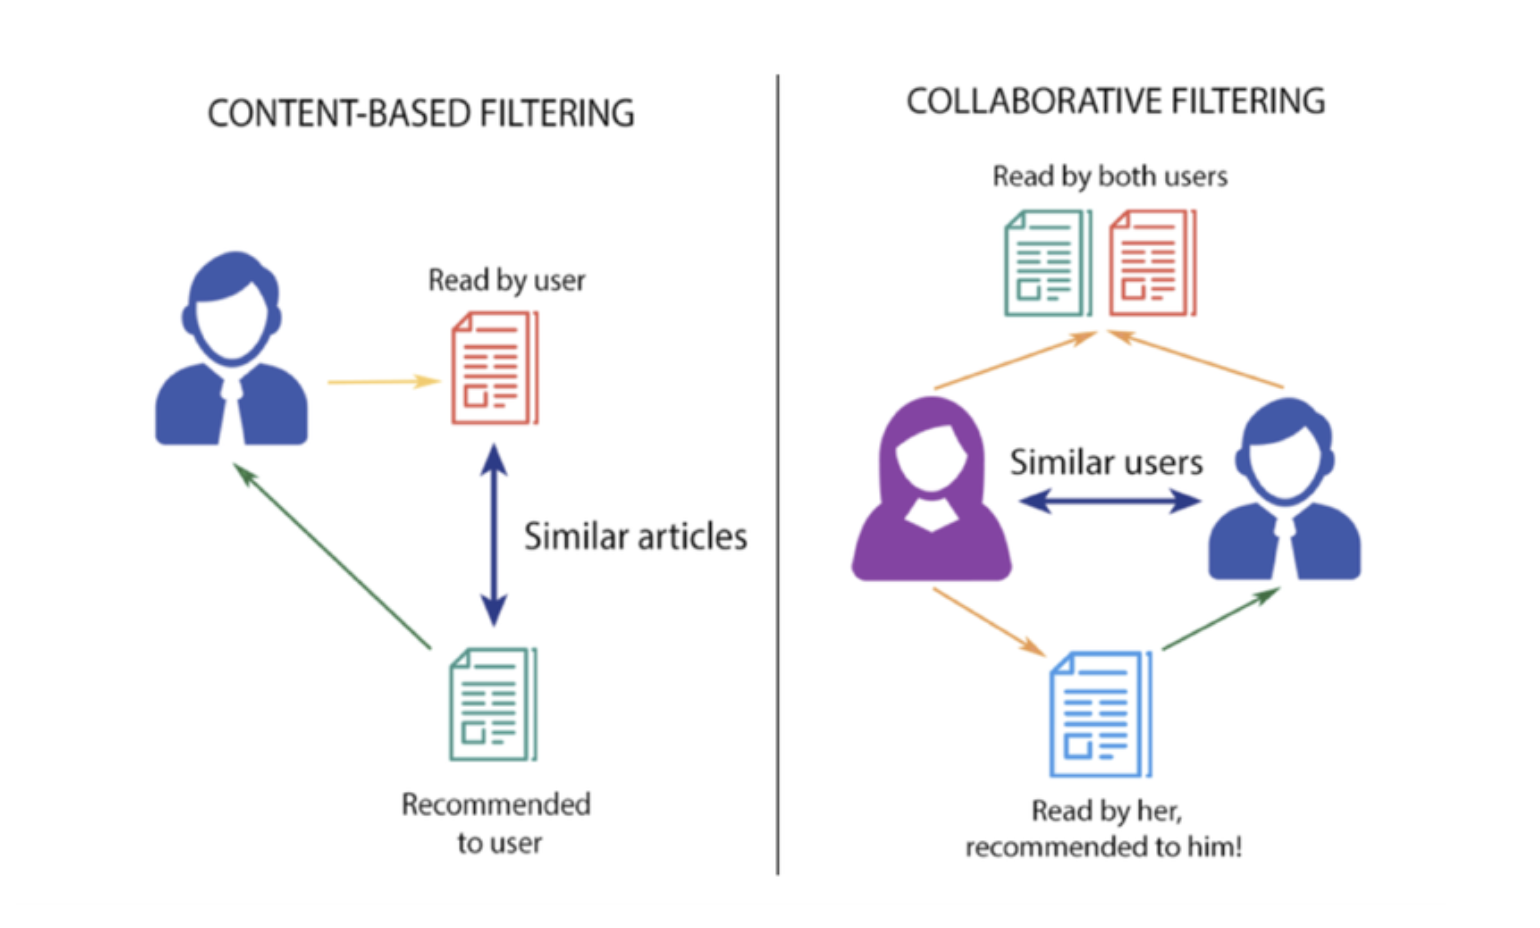

## 콘텐츠 기반 필터링

### 콘텐츠 기반 필터링(Content Based Filtering)

- 콘텐츠 기반은 순수하게 콘텐츠의 내용만을 비교해서 추천하는 방식
- 장르, 배우, 감독 등의 정보를 가지고 영화를 고르는데, 이런 정보들이 영화의 특성(Feature)이 되고 이 특성이 '콘텐츠'가 비슷하다고 말할 수 있는 요인이 된다.

### 콘텐츠 기반 필터링 실습

In [13]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

print('⏩⏩')

⏩⏩


#### 2) Load 데이터

In [14]:
import os
csv_path = os.getenv('HOME')+'/aiffel/movie_recommendation/movie_dataset.csv'
df = pd.read_csv(csv_path)
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


#### 3) 특성 선택


In [16]:
df.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

- 이 각각의 칼럼을 특성으로 볼 수 있지만, 여기서는 다음과 같은 특성만 고려하여 영화의 유사도를 계산하여 추천

In [17]:
features = ['keywords','cast','genres','director']
features

['keywords', 'cast', 'genres', 'director']

In [18]:
def combine_features(row):
    return row['keywords']+" "+row['cast']+" "+row['genres']+" "+row['director']

combine_features(df[:5])

0    culture clash future space war space colony so...
1    ocean drug abuse exotic island east india trad...
2    spy based on novel secret agent sequel mi6 Dan...
3    dc comics crime fighter terrorist secret ident...
4    based on novel mars medallion space travel pri...
dtype: object

--------
--------
--------
--------

In [20]:
df['keywords'].head()

0    culture clash future space war space colony so...
1    ocean drug abuse exotic island east india trad...
2           spy based on novel secret agent sequel mi6
3    dc comics crime fighter terrorist secret ident...
4    based on novel mars medallion space travel pri...
Name: keywords, dtype: object

In [21]:
df['cast'].head()

0    Sam Worthington Zoe Saldana Sigourney Weaver S...
1    Johnny Depp Orlando Bloom Keira Knightley Stel...
2    Daniel Craig Christoph Waltz L\u00e9a Seydoux ...
3    Christian Bale Michael Caine Gary Oldman Anne ...
4    Taylor Kitsch Lynn Collins Samantha Morton Wil...
Name: cast, dtype: object

In [23]:
df['keywords'] + df['cast'].head()

0       culture clash future space war space colony so...
1       ocean drug abuse exotic island east india trad...
2       spy based on novel secret agent sequel mi6Dani...
3       dc comics crime fighter terrorist secret ident...
4       based on novel mars medallion space travel pri...
                              ...                        
4798                                                  NaN
4799                                                  NaN
4800                                                  NaN
4801                                                  NaN
4802                                                  NaN
Length: 4803, dtype: object

In [24]:
(df['keywords'] + df['cast']).head()

0    culture clash future space war space colony so...
1    ocean drug abuse exotic island east india trad...
2    spy based on novel secret agent sequel mi6Dani...
3    dc comics crime fighter terrorist secret ident...
4    based on novel mars medallion space travel pri...
dtype: object

--------
--------
--------
--------

In [25]:
for feature in features:
    df[feature] = df[feature].fillna('')

df["combined_features"] = df.apply(combine_features,axis=1)
df["combined_features"]

0       culture clash future space war space colony so...
1       ocean drug abuse exotic island east india trad...
2       spy based on novel secret agent sequel mi6 Dan...
3       dc comics crime fighter terrorist secret ident...
4       based on novel mars medallion space travel pri...
                              ...                        
4798    united states\u2013mexico barrier legs arms pa...
4799     Edward Burns Kerry Bish\u00e9 Marsha Dietlein...
4800    date love at first sight narration investigati...
4801     Daniel Henney Eliza Coupe Bill Paxton Alan Ru...
4802    obsession camcorder crush dream girl Drew Barr...
Name: combined_features, Length: 4803, dtype: object

- 간단하게 보기 위해 해당 특성을 텍스트 데이터로 보고, 보고자 하는 특성으로 이루어진 텍스트 데이터를 새로운 칼럼으로 생성


#### 4) 벡터화하고, 코사인 유사도를 계산합니다.
- 이제 이 칼럼을 벡터화하고, 코사인 유사도를 계산해보겠습니다. 장르, 배우명, 감독명의 텍스트 데이터를 범주형 데이터로 보기 때문에 단순하게 등장횟수를 세어 숫자 벡터로 만들겠습니다. 사이킷런의 CountVectorizer()를 사용하면 편하게 하실 수 있습니다.

In [26]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(df["combined_features"])
print(type(count_matrix))
print(count_matrix.shape)
print(count_matrix)

<class 'scipy.sparse.csr.csr_matrix'>
(4803, 14845)
  (0, 3115)	1
  (0, 2616)	1
  (0, 4886)	1
  (0, 12386)	2
  (0, 14235)	1
  (0, 2755)	1
  (0, 12299)	1
  (0, 11517)	1
  (0, 14561)	1
  (0, 14820)	1
  (0, 11490)	1
  (0, 12134)	1
  (0, 14291)	1
  (0, 12567)	1
  (0, 7496)	1
  (0, 8831)	1
  (0, 11217)	1
  (0, 86)	1
  (0, 144)	1
  (0, 4435)	1
  (0, 11745)	1
  (0, 4566)	1
  (0, 6542)	1
  (0, 2061)	1
  (1, 86)	1
  :	:
  (4801, 10069)	1
  (4801, 5844)	1
  (4801, 252)	1
  (4801, 4098)	1
  (4801, 14796)	1
  (4801, 11361)	1
  (4801, 2978)	1
  (4801, 12036)	1
  (4801, 6138)	1
  (4802, 9659)	1
  (4802, 3812)	1
  (4802, 1788)	2
  (4802, 4210)	1
  (4802, 5181)	1
  (4802, 2912)	1
  (4802, 3821)	1
  (4802, 1069)	1
  (4802, 11185)	1
  (4802, 3681)	1
  (4802, 5399)	1
  (4802, 3894)	1
  (4802, 2056)	1
  (4802, 3093)	1
  (4802, 4502)	1
  (4802, 5900)	2


`count_matrix`는 type을 확인해 본 결과, `CSR(Compressed Sparse Row)` Matrix였습니다. CSR Matrix는 Sparse한 matrix에서 0이 아닌 유효한 데이터로 채워지는 데이터의 값과 좌표 정보로만으로 구성하여 메모리 사용량을 최소화하면서도 Sparse한 matrix와 동일한 행렬을 표현할 수 있도록 하는 데이터 구조입니다.

예를 들어, `(0, 3115) 1`라고 되어 있는 것은 1번째 row는 3116번째 단어가 1번 출현한다는 뜻입니다. 이 데이터셋에는 총 14845개의 단어가 존재하는데, 이 단어들을 범주형으로 보고 그 단어의 출현 빈도만을 표시한 Matrix가 매우 Sparse하기 때문에 공간을 절약할 수 있는 형태로 표현한 것입니다.

이제 4803개의 영화들이 모두 `Vectorized`되었습니다. 이 영화들끼리의 코사인 유사도를 표현하는 4803X4803 의 `cosine_similarity` matrix를 구해 봅시다.

-----
-----
-----
-----

In [38]:
len(df['combined_features'][0].split())

25

In [45]:
count = 0
for i, word_vec in enumerate(count_matrix[0]):
    print(word_vec[0][0])
    print(i)
    if i > 5:
        break

  (0, 3115)	1
  (0, 2616)	1
  (0, 4886)	1
  (0, 12386)	2
  (0, 14235)	1
  (0, 2755)	1
  (0, 12299)	1
  (0, 11517)	1
  (0, 14561)	1
  (0, 14820)	1
  (0, 11490)	1
  (0, 12134)	1
  (0, 14291)	1
  (0, 12567)	1
  (0, 7496)	1
  (0, 8831)	1
  (0, 11217)	1
  (0, 86)	1
  (0, 144)	1
  (0, 4435)	1
  (0, 11745)	1
  (0, 4566)	1
  (0, 6542)	1
  (0, 2061)	1
0


> 뭔가 저 단어를 뜻하는 번호들만 뽑아내보고 싶은데 어려운 것 같다.

-----
-----
-----
-----

In [46]:
# 4083개 영화들 각각에 대한 cosine_similarity 계산
cosine_sim = cosine_similarity(count_matrix)
print(cosine_sim)
print(cosine_sim.shape)

[[1.         0.10540926 0.12038585 ... 0.         0.         0.        ]
 [0.10540926 1.         0.0761387  ... 0.03651484 0.         0.        ]
 [0.12038585 0.0761387  1.         ... 0.         0.11145564 0.        ]
 ...
 [0.         0.03651484 0.         ... 1.         0.         0.04264014]
 [0.         0.         0.11145564 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.04264014 0.         1.        ]]
(4803, 4803)


### 5) 추천

In [47]:
def get_title_from_index(index):
    return df[df.index == index]["title"].values[0]
def get_index_from_title(title):
    return df[df.title == title]["index"].values[0]

movie_user_likes = "Avatar"
movie_index = get_index_from_title(movie_user_likes)
similar_movies = list(enumerate(cosine_sim[movie_index])) # 굳이 enumerate을 하는 이유는 나중에 섞여도 index를 통해 찾을 수 있어서

sorted_similar_movies = sorted(similar_movies,key=lambda x:x[1],reverse=True)[1:]

i=0
print(movie_user_likes+"와 비슷한 영화 3편은 "+"\n")
for item in sorted_similar_movies:
    print(get_title_from_index(item[0]))
    i=i+1
    if i==3:
        break

Avatar와 비슷한 영화 3편은 

Guardians of the Galaxy
Aliens
Star Wars: Clone Wars: Volume 1


-------
-------
-------
-------

In [53]:
np.array(similar_movies).shape

(4803, 2)

In [54]:
similar_movies[:2]

[(0, 1.0000000000000004), (1, 0.10540925533894599)]

In [50]:
cosine_sim[0].shape

(4803,)

In [48]:
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,combined_features
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron,culture clash future space war space colony so...
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski,ocean drug abuse exotic island east india trad...
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes,spy based on novel secret agent sequel mi6 Dan...
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan,dc comics crime fighter terrorist secret ident...
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton,based on novel mars medallion space travel pri...


-------
-------
-------
-------

## 협업 필터링 (1) 협업 필터링의 종류

협업 필터링의 종류에는 크게 **사용자 기반**과 **아이템 기반** 그리고 **잠재요인(latent factor)** 방식이 있다고 했는데요. 사용자 기반과 아이템 기반은 유사도를 계산하는 방식이고 잠재요인은 행렬 인수분해(matrix factorization)를 이용해 잠재요인을 분석합니다. 넷플릭스의 추천 시스템에 잠재요인 분석을 사용하여 최근에는 잠재요인을 분석하는 사례가 많아지고 있는 추세입니다. 즉, 위에서 설명한 평점행렬로 변환한 후, 평점행렬의 유사도를 계산하여 추천하는 방식은 사용자 기반과 아이템 기반 방식입니다. 그리고 이 평점행렬을 분해하여 더 많은 정보들을 고려하는 방식이 잠재요인 필터링입니다.

### 사용자 기반

사용자 기반 협업 필터링은 아래와 같은 문구로 요약할 수 있죠.

> 당신과 비슷한 고객들이 다음 상품을 구매했습니다.

### 아이템 기반

일반적으로 사용자 기반보다는 아이템 기반 방식이 정확도가 더 높다고 합니다. 아이템 기반 협업 필터링은 아래와 같은 문구로 요약할 수 있습니다.

> 이 상품을 선택한 다른 고객들은 다음 상품을 구매했습니다.

## 협업 필터링 (2) 행렬 인수분해

잠재요인 협업 필터링은 평점행렬을 행렬 인수분해(matrix factorization)를 통해 잠재요인(latent factor)을 분석합니다. 일단 행렬 인수분해가 처음이신 분들도 있을테니 행렬 인수분해에 대해 잠깐 살펴보겠습니다.

행렬 인수분해에는 다음과 같은 기법들이 있습니다.

- SVD(Singular Vector Decomposition)
- ALS(Alternating Least Squares)
- NMF(Non-Negative Factorization)
행렬 인수분해는 인수분해와 비슷하다고 볼 수 있습니다. 30을 인수분해하면 `30 = 6X5 = 3X10 = 1X30` 이런 식으로 곱하기로 나타낼 수 있겠죠? 행렬도 이렇게 곱으로 분해 할 수 있으며, 분해 행렬을 사용하면 원하는 답을 더 쉽게 찾을 수 있습니다. (나중에 이야기 하겠지만, 추천 알고리즘에서 파라미터 수가 줄어 듭니다!)

### Q2. SVD를 사용하는 이유가 뭐라고 설명하고 있나요?

- 특이값 분해는 분해되는 과정보다는 분해된 행렬을 다시 조합하는 과정에서 그 응용력이 빛을 발한다. 기존의 $U,Σ,V^T$로 분해되어 있던 $A$행렬을 특이값 $p$개만을 이용해 $A’$라는 행렬로 ‘부분 복원’ 시킨 할 수 있다. 위에서 말했던 것 특이값의 크기에 따라 A의 정보량이 결정되기 때문에 값이 큰 몇 개의 특이값들을 가지고도 충분히 유용한 정보를 유지할 수 있다. (중략) 최대한 중요한 정보들만 부분 복원해서 사용하면 사진의 용량은 줄어들지만 여전히 사진이 보여주고자 하는 내용은 살릴 수 있을 것이다.

### SVD 실습

`numpy.linalg`의 `svd` 모듈을 import한 후, `4 X 4`형태의 행렬 A를 SVD해보도록 하겠습니다.

In [55]:
import numpy as np
from numpy.linalg import svd

In [57]:
np.random.seed(30)
A = np.random.randint(0, 100, size=(4, 4))
A

array([[37, 37, 45, 45],
       [12, 23,  2, 53],
       [17, 46,  3, 41],
       [ 7, 65, 49, 45]])

In [61]:
svd(A)

(array([[-0.54937068, -0.2803037 , -0.76767503, -0.1740596 ],
        [-0.3581157 ,  0.69569442, -0.13554741,  0.60777407],
        [-0.41727183,  0.47142296,  0.28991733, -0.72082768],
        [-0.6291496 , -0.46389601,  0.55520257,  0.28411509]]),
 array([142.88131188,  39.87683209,  28.97701433,  14.97002405]),
 array([[-0.25280963, -0.62046326, -0.4025583 , -0.6237463 ],
        [ 0.06881225, -0.07117038, -0.8159854 ,  0.56953268],
        [-0.73215039,  0.61782756, -0.23266002, -0.16767299],
        [-0.62873522, -0.47775436,  0.34348792,  0.50838848]]))

결과값으로 행렬 U와 행렬 Σ, 행렬 V의 전치행렬이 생성됩니다. 우리는 이 값들을 unpacking해서 각각 변수명에 할당해 줍니다. 각 행렬들을 확인해 봅시다.



In [62]:
U, Sigma, VT = svd(A)

print('U matrix: {}\n'.format(U.shape),U)
print('Sigma: {}\n'.format(Sigma.shape),Sigma)
print('V Transpose matrix: {}\n'.format(VT.shape),VT)

U matrix: (4, 4)
 [[-0.54937068 -0.2803037  -0.76767503 -0.1740596 ]
 [-0.3581157   0.69569442 -0.13554741  0.60777407]
 [-0.41727183  0.47142296  0.28991733 -0.72082768]
 [-0.6291496  -0.46389601  0.55520257  0.28411509]]
Sigma: (4,)
 [142.88131188  39.87683209  28.97701433  14.97002405]
V Transpose matrix: (4, 4)
 [[-0.25280963 -0.62046326 -0.4025583  -0.6237463 ]
 [ 0.06881225 -0.07117038 -0.8159854   0.56953268]
 [-0.73215039  0.61782756 -0.23266002 -0.16767299]
 [-0.62873522 -0.47775436  0.34348792  0.50838848]]


잘 분해가 되었군요. 이제 다시 복원해 보겠습니다. 복원을 위해서는 U, Σ, VT를 내적합니다. 한 가지 유의할 사항은 Σ는 1차원 이므로 0을 포함한 대각 행렬로 변환한 뒤 내적을 해주어야합니다.

In [63]:
Sigma_mat = np.diag(Sigma)

A_ = np.dot(np.dot(U, Sigma_mat), VT)
A_

array([[37., 37., 45., 45.],
       [12., 23.,  2., 53.],
       [17., 46.,  3., 41.],
       [ 7., 65., 49., 45.]])

---
---
---
---

In [69]:
Sigma

array([142.88131188,  39.87683209,  28.97701433,  14.97002405])

In [68]:
Sigma_mat

array([[142.88131188,   0.        ,   0.        ,   0.        ],
       [  0.        ,  39.87683209,   0.        ,   0.        ],
       [  0.        ,   0.        ,  28.97701433,   0.        ],
       [  0.        ,   0.        ,   0.        ,  14.97002405]])

In [70]:
np.diag(Sigma).shape

(4, 4)

In [65]:
A == A_.astype(np.uint32)

array([[False,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [66]:
A_.astype(np.uint32)

array([[36, 37, 45, 45],
       [12, 23,  2, 53],
       [17, 46,  3, 41],
       [ 7, 65, 49, 45]], dtype=uint32)

> 컴퓨터 연산이 중간에 실행되기 때문에 floating point 이슈로 값이 달라지는 경우가 있다.

---
---
---
---

### Truncated SVD

추천 시스템에서의 행렬 인수분해는 SVD 중에서도 Truncated SVD를 사용합니다.

Truncated SVD는 SVD의 일종으로 우리말로 번역하면 잘린 SVD라고합니다. 다른 말로 LSA(Latent semantic analysis), 잠재 의미 분석 이라고 번역할 수 있습니다. Truncated SVD를 이용해 분해한 뒤 복원하면 SVD 처럼 완벽히 같은 행렬이 나오지 않습니다. 그 이유는 Truncated SVD는 차원을 축소한 다음 행렬을 분해하기 때문입니다.

사이킷런에서는 `TruncatedSVD` 기능을 함수로 제공해 줍니다.

## 협업 필터링 (3) 행렬 인수분해와 잠재요인 협업 필터링

SVD(특이값 분해)를 평가행렬에 적용하여 잠재요인을 분석하는 것을 도식화하면 아래와 같습니다.

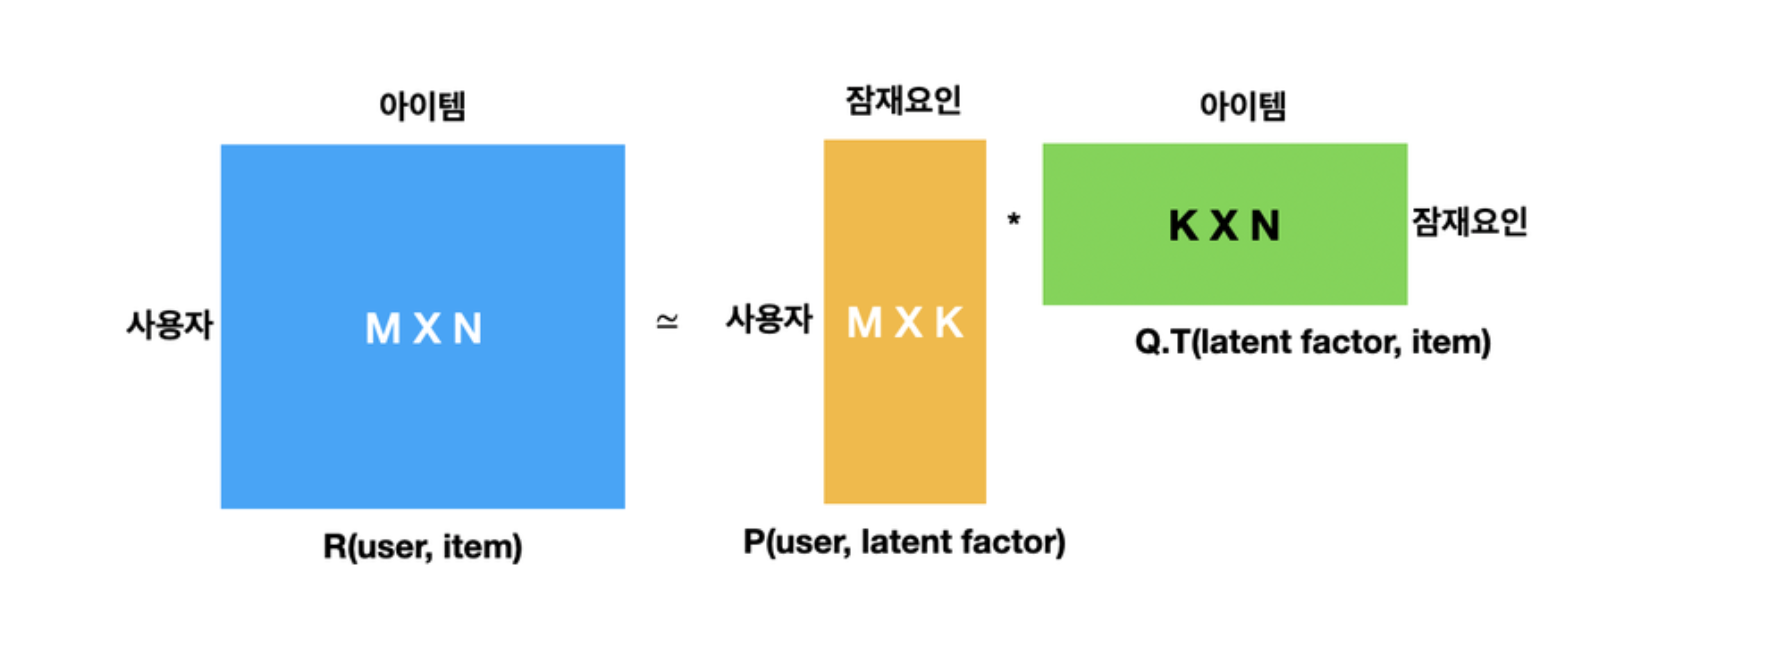

표기법
- R: 사용자와 아이템 사이의 행렬
- P: 사용자와 잠재요인 사이의 행렬
- Q: 아이템과 잠재요인 사이의 행렬 —> 전치 행렬 형태로 나타냄

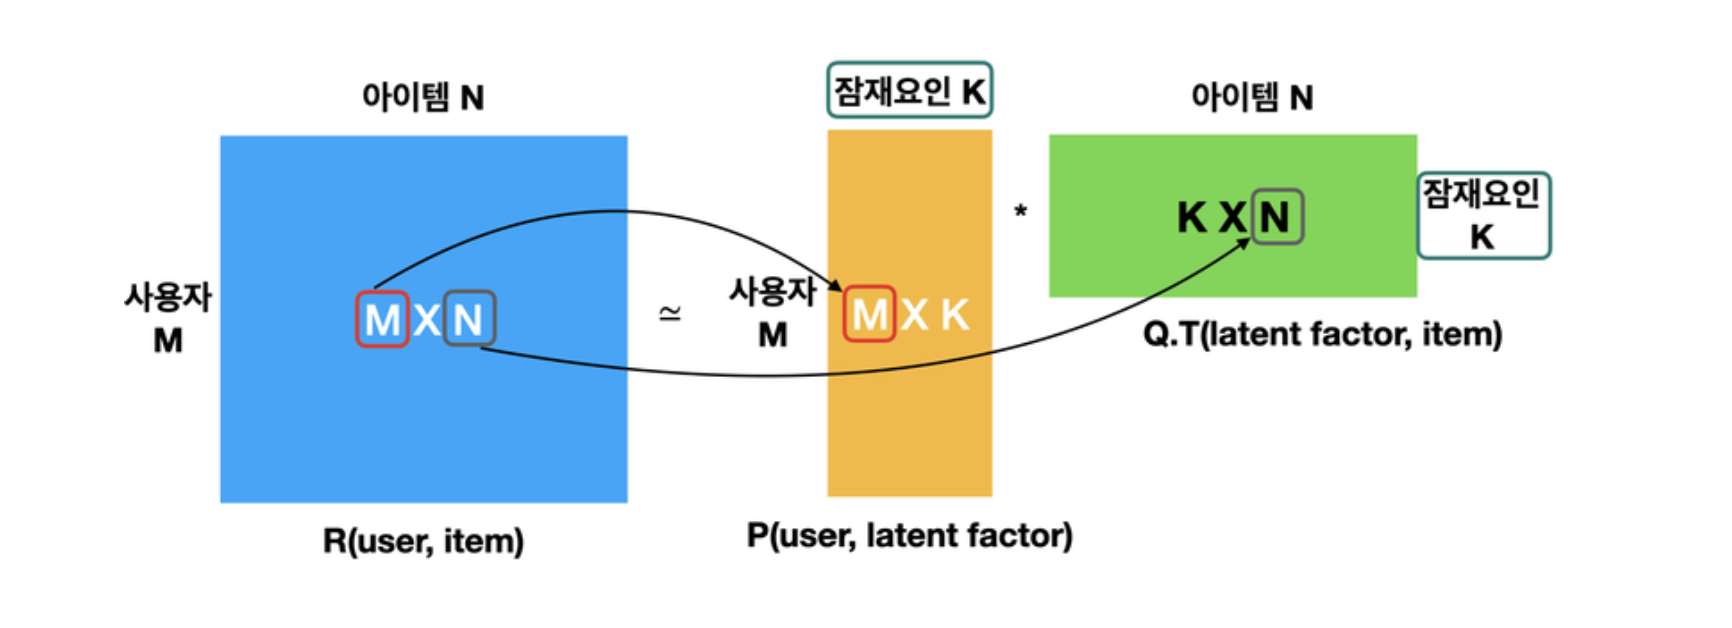

사용자가 아이템에 대한 평점을 매기는 요인으로 많은 항목들이 있을 겁니다. "배우가 마음에 들어서, 감독이 좋아서, 좋아하는 장르나 분위기, 마침 그날 영화 가격이 매우 싸서" 등 평점을 매기는 것은 지극히 주관적입니다. 사람의 마음은 알 수가 없어요~

그래서 사용자가 평점을 매기는 요인을 그냥 "잠재요인"으로 취급한 뒤 그걸 SVD기법을 이용해 분해한 뒤 다시 합치는 방법으로 영화에 평점을 매긴 이유를 벡터화하여 이를 기반으로 추천합니다. 이 기법은 넷플릭스나 왓챠, 유튜브 같은 대 기업에서 사용하여 그 효과를 입증해 내었고 이후 많은 기업들이 이 기법을 채택하여 사용하고 있습니다.

다음 동영상은 행렬 인수분해를 추천 시스템에 적용한 것을 보다 상세하게 설명한 동영상입니다.

이렇듯 협업 필터링을 이용하면 사용자가 아이템에 대해 평점을 매긴 평점행렬을 행렬 인수분해(Matrix Factorization)를 통해 잠재요인을 분석한 뒤 유사도를 계산할 수도 있고 사용자의 평점도 예측할 수 있습니다.

## 실제 추천 시스템

이상으로 추천 시스템의 기본에 대해 살펴 보았는데요. 실제로 YouTube나 Netflix 같은 대형 기업에서는 추천에 더 많은 것들을 고려합니다.

사용자의 구매 여부와 평점 데이터 뿐만 아니라 얼마나 오랜 시간 동안 시청(혹은 해당 웹 사이트에 머물렀는지), 어떤 사이트에서 유입이 되었는지, 그리고 시청한 뒤 구매로 이어지기까지의 시간 등 우리의 족적들을 다 분석합니다. 이를 전문 용어로 Digital Footprint(디지털 발자국), Digital Shadow(디지털 그림자)라고 해요.

그리고 이중에서 가장 중요한 지표가 바로 클릭률입니다. 전문 용어로는 CTR(Click Through Rate)입니다. CTR은 마케팅에서도 중요한 지표로 작용하는 용어이기도합니다.

이러한 데이터들을 모아 추천을 한 뒤, 해당 아이템이 적절한 추천인지 여부를 평가하는 것 역시 중요한 일입니다. 추천한 제품이 구매로 이어졌는지를 통해 추천에 성공했는지를 평가하기도 하고 모델 단계에서 평가하기도 합니다.

이처럼, 추천 시스템은 굉장히 큰 시스템입니다. 데이터를 기반으로 사용자에게 적절한 제품을 추천한다는 것 그리고 그것이 구매로 이어지는것은 매출과 직결되는 문제이기도 합니다. 좋은 추천 시스템을 만들기 위해서는 어떤 데이터를 쓸지 많은 고민이 필요합니다. 사용자와 연관성이 있고, 구매와 직결되는 각종 데이터를 수집하고 정렬(sorting)하여 다시 순위(ranking)를 매긴 다음 평가하는 작업을 반복해가며 적합한 데이터와 추천 시스템을 만들어냅니다.

> 추천 시스템에 머신러닝이 적용될 수도 있는 것이지 머신러닝 안에 추천 시스템이 있는 것은 결코 아닙니다.

다음 동영상은 추천 시스템으로 유명한 기업인 넷플릭스와 왓챠의 추천 기술 관련 동영상입니다. 아래 동영상을 시청하며 이번 시간을 마무리하겠습니다.